In [3]:
# Big Data Analysis & Visualization
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Start Spark Session

In [4]:
spark = SparkSession.builder \
    .appName("BigDataAnalysis") \
    .getOrCreate()

## Load Cleaned Data

In [13]:
df = spark.read.parquet("../data/processed/cleaned_data.parquet")
df.show(5)
df.printSchema()

+-------+----+-------------+-------------+-----------+----------------------+-------------------+------------------+---------------------+
|country|year|co2_emissions|precipitation|temperature|crop_production_tonnes|food_security_index|cereal_yield_kg_ha|agricultural_land_pct|
+-------+----+-------------+-------------+-----------+----------------------+-------------------+------------------+---------------------+
|    USA|2000|      11260.0|        760.0|       15.0|                 15440|               65.0|              2940|                   70|
|    USA|2001|      11360.0|        762.0|       15.1|                 15940|               66.5|              2990|                   70|
|    USA|2002|      11460.0|        764.0|       15.2|                 16440|               68.0|              3040|                   70|
|    USA|2003|      11560.0|        766.0|       15.3|                 16940|               69.5|              3090|                   70|
|    USA|2004|      11660.0

## Basic Descriptive Analysis

In [14]:
df.describe().show()

+-------+-------+-----------------+-----------------+------------------+------------------+----------------------+-------------------+------------------+---------------------+
|summary|country|             year|    co2_emissions|     precipitation|       temperature|crop_production_tonnes|food_security_index|cereal_yield_kg_ha|agricultural_land_pct|
+-------+-------+-----------------+-----------------+------------------+------------------+----------------------+-------------------+------------------+---------------------+
|  count|     23|               23|               23|                23|                23|                    23|                 23|                23|                   23|
|   mean|   null|           2011.0|          12360.0|             782.0|              16.1|               20940.0|               81.5|            3490.0|                 70.0|
| stddev|   null|6.782329983125268|678.2329983125268|13.564659966250536|0.6782329983125249|     3391.164991562634| 10.17

In [17]:
df.groupBy("country").count().show()

# Average temperature per year
df.groupBy("year").avg("temperature").show()

+-------+-----+
|country|count|
+-------+-----+
|    USA|   23|
+-------+-----+

+----+----------------+
|year|avg(temperature)|
+----+----------------+
|2007|            15.7|
|2014|            16.4|
|2021|            17.1|
|2012|            16.2|
|2022|            17.2|
|2016|            16.6|
|2018|            16.8|
|2009|            15.9|
|2010|            16.0|
|2006|            15.6|
|2017|            16.7|
|2013|            16.3|
|2004|            15.4|
|2003|            15.3|
|2002|            15.2|
|2011|            16.1|
|2020|            17.0|
|2005|            15.5|
|2019|            16.9|
|2008|            15.8|
+----+----------------+
only showing top 20 rows



## Temperature Trend Over Years

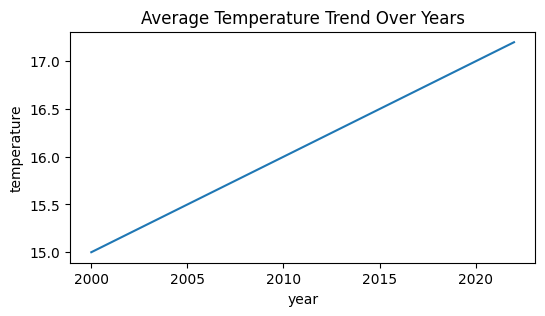

In [21]:
pdf = df.toPandas()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,3))
sns.lineplot(data=pdf, x="year", y="temperature")
plt.title("Average Temperature Trend Over Years")
plt.show()

## CO₂ Emissions by Country (Top 10)

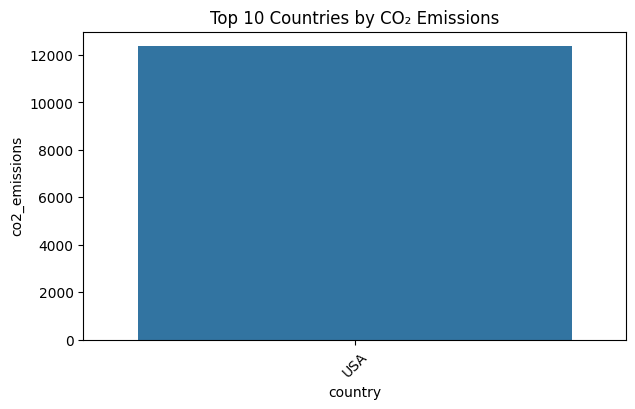

In [23]:
top_countries = (
    pdf.groupby("country")["co2_emissions"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(7,4))
sns.barplot(data=top_countries, x="country", y="co2_emissions")
plt.xticks(rotation=45)
plt.title("Top 10 Countries by CO₂ Emissions")
plt.show()

## Correlation Heatmap

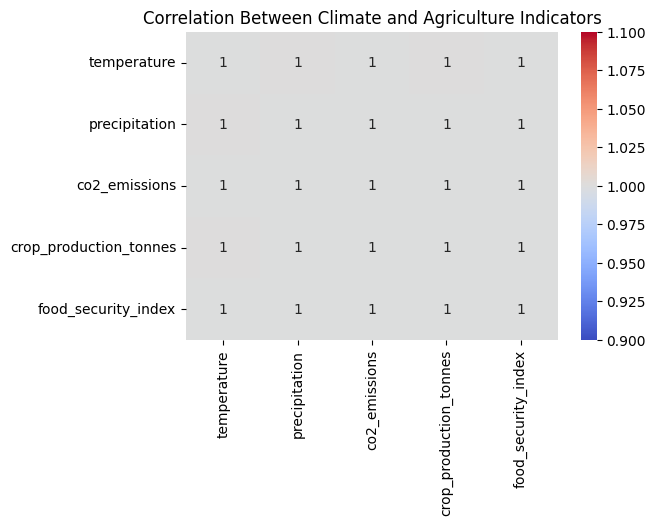

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(
    pdf[[
        "temperature",
        "precipitation",
        "co2_emissions",
        "crop_production_tonnes",
        "food_security_index"
    ]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Climate and Agriculture Indicators")
plt.show()

## CO₂ Emissions vs Crop Production

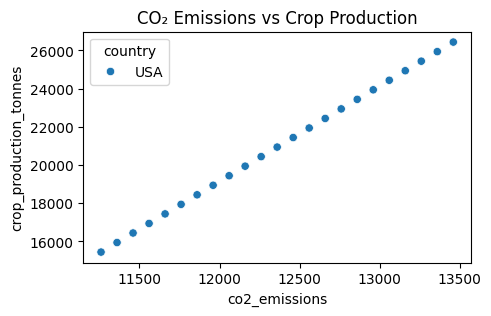

In [26]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    data=pdf,
    x="co2_emissions",
    y="crop_production_tonnes",
    hue="country"
)
plt.title("CO₂ Emissions vs Crop Production")
plt.show()

## Heatmap: Agricultural Factors Only

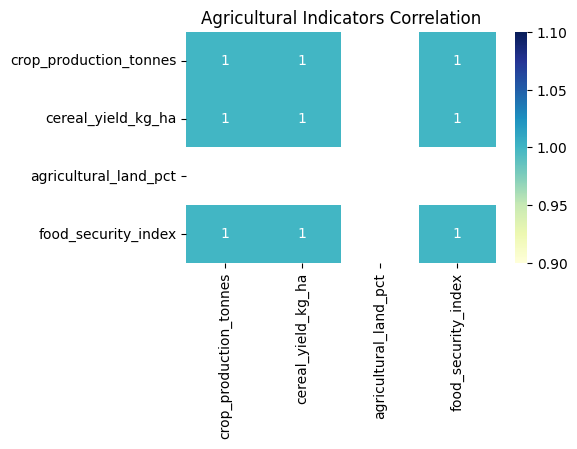

In [30]:
plt.figure(figsize=(5,3))
sns.heatmap(
    pdf[[
        "crop_production_tonnes",
        "cereal_yield_kg_ha",
        "agricultural_land_pct",
        "food_security_index"
    ]].corr(),
    annot=True,
    cmap="YlGnBu"
)
plt.title("Agricultural Indicators Correlation")
plt.show()